### PROJECT 1

In [1]:
import cv2
import numpy as np
from PIL import Image
%matplotlib inline
from matplotlib import pyplot as plt

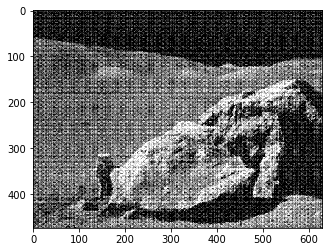

In [2]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

img = np.array(Image.open("apollo 17_boulder_noisy.tif").convert("L"))
noise_removed = median_filter(img, 3)
removed_noise = np.asarray(noise_removed, dtype=np.uint8)
Image.fromarray(removed_noise, 'L').save('median.png', 'PNG')
plt.imshow(removed_noise, cmap="gray")
plt.show()

### PROJECT 2

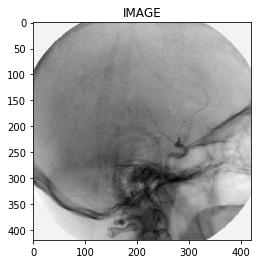

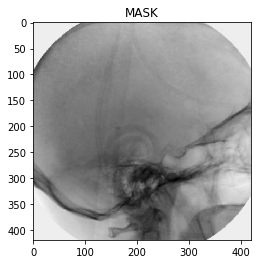

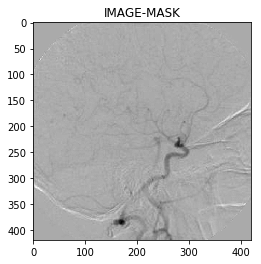

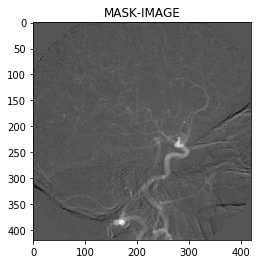

In [3]:
%matplotlib inline

def intScaling4e():
    img11 = cv2.imread('angiography_live_ image.tif',0)
    img21 = cv2.imread('angiography_mask_image.tif',0)
    plt.title("IMAGE")
    plt.imshow(img11,cmap='gray')
    plt.show()
    plt.title("MASK")
    plt.imshow(img21,cmap='gray')
    plt.show()
    img11= np.int32(img11)
    img21= np.int32(img21)
    img31=img11-img21
    plt.title("IMAGE-MASK")
    plt.imshow(img31,cmap='gray')
    plt.show()
    img32=img21-img11
    plt.title("MASK-IMAGE")
    plt.imshow(img32,cmap='gray')
    plt.show()
    
intScaling4e()

INFERENCE FROM MASK-IMAGE:

In the intial IMAGE-MASK case, the corresponding pixels got subtracted resulting in a gray display and thus we were left with regions where the original live image had higher intensity compared to the mask, represented by black layers in the resultant. While doing the subtraction other way, the polarity of the image got reversed, mapping black to white and vice versa.
    
    

### PROJECT 3

In [4]:

def unnormalize(img1):
    unique, counts = np.unique(img1, return_counts=True)
    plt.bar(unique, counts) 
def normalize(img2):
    unique, counts = np.unique(img2, return_counts=True)
    plt.bar(unique, counts/len(img2))

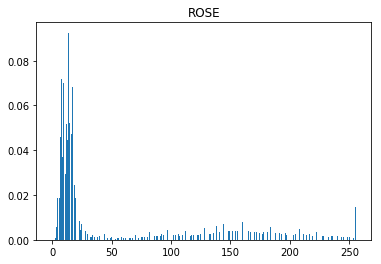

In [5]:
def imageHist4e(f,mode):
    img = cv2.imread(f,0)
    img1 = img.ravel()
    if mode=='n':
        normalize(img1)
    elif mode=='u':
        unnormalize(img1)
plt.figure()
plt.title("ROSE")
imageHist4e("rose1024.tif",'n')





CONCLUSIONS ABOUT THE IMAGE FROM THE HISTOGRAM:

The given image has pixels whose levels are more concentrated in the dark scale as shown by the histogram. We can infer that most of the pixels of the given image have low intensity as they are in the [0, 30] range approximately.

###  PROJECT 4

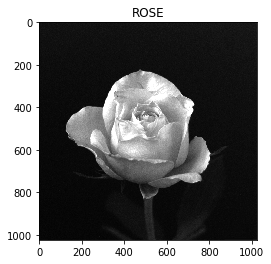

Mean= 46.7893533707
Variance= 4369.75665048
Third Moment= 503521.531276
Fourth Moment= 89457514.3271


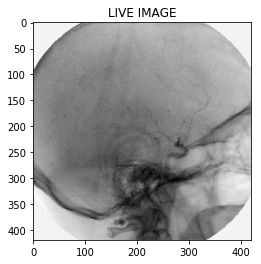

Mean= 129.305867347
Variance= 1856.36389981
Third Moment= 15009.1721123
Fourth Moment= 10277438.9814


In [6]:

def centralMoments4e(f,n):
    u=[]
    mean = 0
    var = 0
    x=0
    img14 = cv2.imread(f,0)
    img15 = img14.ravel()
    unique, counts = np.unique(img15, return_counts=True)
    for i in range(len(unique)):
        mean += (counts[i]*unique[i])/(sum(counts))
    for i in range(len(img15)):
        var += ((img15[i]-mean)**2)/len(img15)
    if n==1:
        u.append(mean)
    elif n==2:
        u.append(var)
    elif n>2:
        for i in range(len(img15)):
            x+=((img15[i]-mean)**n)/len(img15)
        u.append(x)
   
    
    return u[-1]


img27 = cv2.imread('rose1024.tif',0)
plt.title("ROSE")
plt.imshow(img27,cmap='gray')
plt.show()
print("Mean=",centralMoments4e("rose1024.tif",1)) 
print("Variance=",centralMoments4e("rose1024.tif",2)) 
print("Third Moment=",centralMoments4e("rose1024.tif",3))
print("Fourth Moment=",centralMoments4e("rose1024.tif",4))




img27 = cv2.imread('angiography_live_ image.tif',0)
plt.title("LIVE IMAGE")
plt.imshow(img27,cmap='gray')
plt.show()
print("Mean=",centralMoments4e("angiography_live_ image.tif",1)) 
print("Variance=",centralMoments4e("angiography_live_ image.tif",2)) 
print("Third Moment=",centralMoments4e("angiography_live_ image.tif",3))
print("Fourth Moment=",centralMoments4e("angiography_live_ image.tif",4))
    
    
    

### HISTOGRAMS FOR BOTH




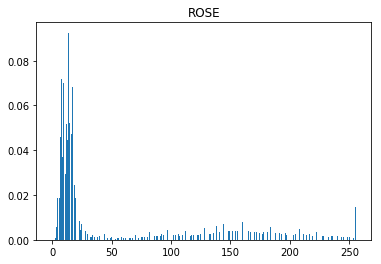

In [7]:

plt.title("ROSE")
imageHist4e("rose1024.tif",'n')
plt.figure()


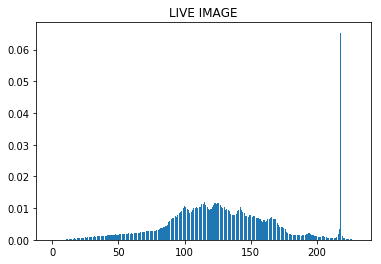

In [8]:
plt.title("LIVE IMAGE")
imageHist4e("angiography_live_ image.tif",'n')

Mean is the estimation of the average intensity of the image. Because of the concentrated high intensity values between [0,50] for ROSE, and [100,150] for the live image, the mean for them were in those intervals respectively. Since mean can not always be reliable, we find variance as a measure for
quantifying the spread or dispersion of values about the mean. Third moment is a measure of symmetry about the mean. Evidently, it is higher for left skewed graphs. The fourth moment  is a measure of flatness of the PMF.